In [698]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import ast
plt.rcParams['figure.figsize'] = (7, 5) #(L,l)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv("2015_2016_building_energy_benchmarking_cleaned",sep =",", index_col = "OSEBuildingID")
print(data.shape)
data.head()

(1694, 17)


,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
OSEBuildingID,,,,,,,,,,,,,,,,,
325,2015-01-01,NonResidential,Retail Store,DOWNTOWN,1.0,4.0,111077.0,91.0,9898724.0,69.01,32.0,1.5,1.00000,0.00000,111077.0,27769.250,0.439292
400,2015-01-01,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1.0,6.0,98370.0,45.0,6525887.0,47.24,115.0,1.0,0.73651,0.26349,98370.0,16395.000,0.236408
442,2015-01-01,NonResidential,Large Office,LAKE UNION,1.0,4.0,193788.0,59.0,16760217.0,116.84,74.0,5.0,0.80466,0.19534,193788.0,48447.000,1.171413
499,2015-01-01,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,1.0,3.0,76598.0,76.0,4476997.0,134.69,13.0,2.0,0.72049,0.27951,76598.0,25532.667,2.924194
559,2015-01-01,NonResidential,Large Office,LAKE UNION,1.0,4.0,186971.0,86.0,12662456.0,226.92,40.0,2.0,1.00000,0.00000,186971.0,46742.750,1.044201


In [699]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 325 to 50226
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DataYear                      1694 non-null   object 
 1   BuildingType                  1694 non-null   object 
 2   PrimaryPropertyType           1694 non-null   object 
 3   Neighborhood                  1694 non-null   object 
 4   NumberofBuildings             1694 non-null   float64
 5   NumberofFloors                1694 non-null   float64
 6   PropertyGFATotal              1694 non-null   float64
 7   ENERGYSTARScore               1694 non-null   float64
 8   SiteEnergyUse(kBtu)           1694 non-null   float64
 9   GHGEmissions(MetricTonsCO2e)  1694 non-null   float64
 10  Age                           1694 non-null   float64
 11  NumberofPropertyUseTypes      1694 non-null   float64
 12  GFABuildingRate               1694 non-null   float64
 13  

# <font color="#1d479b">Préparation des colonnes</font>

In [674]:
data.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
count,1694.000000,1694.000000,1.694000e+03,1694.000000,1.694000e+03,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1.694000e+03,1694.0000,1694.000000
mean,1.084120,4.106848,1.130441e+05,63.723731,7.953726e+06,178.963722,59.211334,1.891381,0.937323,0.062677,1.097043e+05,inf,2.809018
std,0.885255,6.523059,1.931116e+05,26.530478,2.156649e+07,697.028338,32.826598,1.217856,0.139255,0.139255,1.878412e+05,NaN,2.213056
min,0.500000,0.000000,1.128500e+04,1.000000,0.000000e+00,0.120000,6.000000,1.000000,-0.251160,-0.000010,7.166667e+03,221.6970,0.021130
25%,1.000000,1.000000,2.938300e+04,46.000000,1.216915e+06,20.165000,32.000000,1.000000,1.000000,0.000000,2.916100e+04,13283.1375,0.869149
50%,1.000000,2.000000,4.926600e+04,69.000000,2.551750e+06,50.267500,56.000000,2.000000,1.000000,0.000000,4.928950e+04,22982.0835,2.286785
75%,1.000000,4.000000,1.065892e+05,85.500000,6.958824e+06,139.605000,91.000000,2.000000,1.000000,0.000000,1.042888e+05,38218.2500,4.236630
max,20.000000,99.000000,2.200000e+06,100.000000,4.483853e+08,16870.980000,121.000000,13.000000,1.000010,1.251160,2.761918e+06,inf,8.843544


Des  valeurs tendent infinies. Nous allons regarder de plus prêt pour `GFAPerFloor` ces données et les corriger en les remplaçant par 0 :


In [675]:
len(data[ (data.GFAPerFloor == np.inf)| (data.GFAPerFloor == np.inf)])

15

In [676]:
data[ (data.GFAPerFloor == np.inf)| (data.GFAPerFloor == np.inf) ]

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
OSEBuildingID,,,,,,,,,,,,,,,,,
267,2016-01-01,NonResidential,Hotel,DOWNTOWN,1.0,0.0,934292.0,53.25,6.442916e+07,1598.655,22.0,5.0,1.00000,0.00000,934292.000,inf,0.455683
656,2016-01-01,NonResidential,Medical Office,EAST,1.0,0.0,225982.0,57.00,1.955939e+07,648.285,17.0,1.0,1.00000,0.00000,225982.000,inf,0.491603
657,2016-01-01,NonResidential,Mixed Use Property,DOWNTOWN,0.5,0.0,516407.0,25.00,4.419219e+07,978.705,15.0,7.0,1.00000,0.00000,1032814.000,inf,0.838548
758,2016-01-01,NonResidential,Other,DOWNTOWN,1.0,0.0,947987.0,44.75,4.732709e+07,329.940,22.0,4.0,0.76783,0.23217,947987.000,inf,0.485479
23311,2016-01-01,NonResidential,Medical Office,EAST,1.0,0.0,274568.0,52.00,2.527896e+07,1112.250,76.0,2.0,1.00000,0.00000,274568.000,inf,0.424374
24086,2016-01-01,Campus,Other,GREATER DUWAMISH,10.0,0.0,205883.5,55.00,2.548074e+07,611.855,30.0,2.0,1.00000,0.00000,20588.350,inf,1.138848
40028,2016-01-01,NonResidential,Warehouse,NORTHEAST,1.0,0.0,384772.0,67.00,1.530930e+07,399.220,81.0,2.0,1.00000,0.00000,384772.000,inf,6.307493
40031,2016-01-01,NonResidential,Medical Office,NORTHEAST,1.0,0.0,30287.0,44.00,2.084881e+06,30.300,61.0,1.0,1.00000,0.00000,30287.000,inf,6.184218
40034,2016-01-01,NonResidential,Small- and Mid-Sized Office,NORTHEAST,1.0,0.0,21931.0,26.50,3.839674e+06,141.370,61.0,1.0,1.00000,0.00000,21931.000,inf,6.173959


In [700]:
data['GFAPerBuilding'] = np.where(((data.GFAPerBuilding == np.inf) & (data.NumberofBuildings == 0)),0, data.GFAPerBuilding)
data['GFAPerFloor'] = np.where(((data.GFAPerFloor == np.inf) & (data.NumberofFloors == 0)),0, data.GFAPerFloor)

In [701]:
data[data.GFAPerFloor == np.inf].head()

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
OSEBuildingID,,,,,,,,,,,,,,,,,


In [679]:
data.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
count,1694.000000,1694.000000,1.694000e+03,1694.000000,1.694000e+03,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1.694000e+03,1.694000e+03,1694.000000
mean,1.084120,4.106848,1.130441e+05,63.723731,7.953726e+06,178.963722,59.211334,1.891381,0.937323,0.062677,1.097043e+05,3.358959e+04,2.809018
std,0.885255,6.523059,1.931116e+05,26.530478,2.156649e+07,697.028338,32.826598,1.217856,0.139255,0.139255,1.878412e+05,4.702059e+04,2.213056
min,0.500000,0.000000,1.128500e+04,1.000000,0.000000e+00,0.120000,6.000000,1.000000,-0.251160,-0.000010,7.166667e+03,0.000000e+00,0.021130
25%,1.000000,1.000000,2.938300e+04,46.000000,1.216915e+06,20.165000,32.000000,1.000000,1.000000,0.000000,2.916100e+04,1.298619e+04,0.869149
50%,1.000000,2.000000,4.926600e+04,69.000000,2.551750e+06,50.267500,56.000000,2.000000,1.000000,0.000000,4.928950e+04,2.264850e+04,2.286785
75%,1.000000,4.000000,1.065892e+05,85.500000,6.958824e+06,139.605000,91.000000,2.000000,1.000000,0.000000,1.042888e+05,3.769195e+04,4.236630
max,20.000000,99.000000,2.200000e+06,100.000000,4.483853e+08,16870.980000,121.000000,13.000000,1.000010,1.251160,2.761918e+06,1.100000e+06,8.843544


Supprimer les colonnes d'identification.

In [473]:
#print(data.shape)
#data.drop(['OSEBuildingID'], axis=1, inplace = True)
#print(data.shape)

In [702]:
numerical_features = data.select_dtypes(include=['int64','float64'])
categorical_features = data.select_dtypes(exclude=['int64','float64']) 

In [703]:
categorical_features.nunique()

DataYear                2
BuildingType            5
PrimaryPropertyType    23
Neighborhood           19
dtype: int64

In [704]:
list(numerical_features.columns)

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'Age',
 'NumberofPropertyUseTypes',
 'GFABuildingRate',
 'GFAParkingRate',
 'GFAPerBuilding',
 'GFAPerFloor',
 'harvesine_distance']



La date de relevé `DataYear` ne nous sera pas utile ici, nous la supprimerons du jeu de données. `ENERGYSTARScore` a été complétée par la méthode **KNN Imputer**. Nous allons l'écarter du dataset mais nous la conservons pour verifier son impact sur la variable à prédire `GHGEmissions(MetricTonsCO2e)`.

In [705]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore'], axis=1)

In [706]:
energystar_score

OSEBuildingID
325       91.00
400       45.00
442       59.00
499       76.00
559       86.00
560        1.00
675       60.00
714       95.00
790       84.75
838       54.00
19445     94.00
19656     68.00
19658     86.00
19780     46.50
21237     81.00
21471     71.75
21688     49.00
21796     72.00
22138    100.00
22441     88.00
22446    100.00
23163     76.00
23848     46.75
24904     68.50
25042     68.00
25455     21.25
25654     90.75
27639     11.50
27829     64.00
49859     62.50
1         62.50
2         56.00
3         30.50
5         28.50
8         71.00
9         48.25
10        26.00
11        75.75
12        44.50
15        39.00
16        34.00
17        43.50
18        57.00
19        24.50
21        89.25
22        52.50
23        30.50
24        19.50
25        61.00
26        71.50
27        84.25
28        95.50
29        84.50
30        41.75
31        92.50
32        84.75
33        38.50
34        57.00
35        58.50
36        77.50
37        94.00
38        

In [707]:
categorical_features = categorical_features.drop(['DataYear'], axis=1)
#categorical_features = categorical_features.drop(['PrimaryPropertyType'], axis=1)
#categorical_features = categorical_features.drop(['Neighborhood'], axis=1)

In [708]:
data_filter = pd.concat([categorical_features, numerical_features], axis=1)
data_filter.shape

(1694, 15)

In [709]:
#Avant Normalisation
data_filter.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
OSEBuildingID,,,,,,,,,,,,,,,
325,NonResidential,Retail Store,DOWNTOWN,1.0,4.0,111077.0,9898724.0,69.01,32.0,1.5,1.00000,0.00000,111077.0,27769.250,0.439292
400,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1.0,6.0,98370.0,6525887.0,47.24,115.0,1.0,0.73651,0.26349,98370.0,16395.000,0.236408
442,NonResidential,Large Office,LAKE UNION,1.0,4.0,193788.0,16760217.0,116.84,74.0,5.0,0.80466,0.19534,193788.0,48447.000,1.171413
499,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,1.0,3.0,76598.0,4476997.0,134.69,13.0,2.0,0.72049,0.27951,76598.0,25532.667,2.924194
559,NonResidential,Large Office,LAKE UNION,1.0,4.0,186971.0,12662456.0,226.92,40.0,2.0,1.00000,0.00000,186971.0,46742.750,1.044201


# <font color="#1d479b">Normalisation </font>

Il n'est pas necessaire de normaliser les variables encodées, donc on normalise avant puis on encode après.

In [710]:
from sklearn.model_selection import train_test_split

X = data_filter.drop(['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)'], axis=1) #dataframe 
Y = data_filter[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]                #df


XTrain, XTest, YTrain, YTest  = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1355 lignes,
Test: 339 lignes.



In [711]:
X.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
OSEBuildingID,,,,,,,,,,,,,
325,NonResidential,Retail Store,DOWNTOWN,1.0,4.0,111077.0,32.0,1.5,1.00000,0.00000,111077.0,27769.250,0.439292
400,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1.0,6.0,98370.0,115.0,1.0,0.73651,0.26349,98370.0,16395.000,0.236408
442,NonResidential,Large Office,LAKE UNION,1.0,4.0,193788.0,74.0,5.0,0.80466,0.19534,193788.0,48447.000,1.171413
499,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,1.0,3.0,76598.0,13.0,2.0,0.72049,0.27951,76598.0,25532.667,2.924194
559,NonResidential,Large Office,LAKE UNION,1.0,4.0,186971.0,40.0,2.0,1.00000,0.00000,186971.0,46742.750,1.044201


In [712]:
#Scaler - SAUF  les variables à prédire 
numeric_features = data_filter[['harvesine_distance','NumberofBuildings','NumberofFloors',
                    'PropertyGFATotal','Age','NumberofPropertyUseTypes',
                    'GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']].values 

In [713]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scale = scaler.fit(numeric_features)
X_scaled = scaler.transform(numeric_features)

In [714]:
X_scaled

array([[-1.07110977, -0.09505206, -0.01638483, ..., -0.45022264,
         0.00730997, -0.12381929],
       [-1.16281288, -0.09505206,  0.29031031, ...,  1.44247988,
        -0.06035756, -0.36579005],
       [-0.74019327, -0.09505206, -0.01638483, ...,  0.9529445 ,
         0.447764  ,  0.31607002],
       ...,
       [-0.18164046, -0.09505206, -0.47642755, ..., -0.45022264,
        -0.51413528, -0.43467383],
       [ 1.1663595 , -0.09505206, -0.47642755, ..., -0.45022264,
        -0.50910828, -0.41459159],
       [ 0.95422549, -0.09505206, -0.47642755, ..., -0.45022264,
        -0.48697135, -0.32615741]])

In [715]:
data_filter[['harvesine_distance','NumberofBuildings','NumberofFloors',
                    'PropertyGFATotal','Age','NumberofPropertyUseTypes',
                    'GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']]= X_scaled

In [716]:
#Apres Normalisation
print(data_filter.shape)
data_filter.head()

(1694, 15)


,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
OSEBuildingID,,,,,,,,,,,,,,,
325,NonResidential,Retail Store,DOWNTOWN,-0.095052,-0.016385,-0.010189,9898724.0,69.01,-0.829186,-0.321464,0.450223,-0.450223,0.007310,-0.123819,-1.071110
400,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,-0.095052,0.290310,-0.076010,6525887.0,47.24,1.699998,-0.732143,-1.442480,1.442480,-0.060358,-0.365790,-1.162813
442,NonResidential,Large Office,LAKE UNION,-0.095052,-0.016385,0.418244,16760217.0,116.84,0.450642,2.553287,-0.952945,0.952945,0.447764,0.316070,-0.740193
499,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,-0.095052,-0.169732,-0.188787,4476997.0,134.69,-1.408156,0.089215,-1.557555,1.557555,-0.176298,-0.171399,0.052059
559,NonResidential,Large Office,LAKE UNION,-0.095052,-0.016385,0.382932,12662456.0,226.92,-0.585410,0.089215,0.450223,-0.450223,0.411462,0.279815,-0.797693


Avant de faire les Dummies, on corrige la modalite : Restaurant\n  pour `PrimaryPropertyType`

In [717]:
data_filter.PrimaryPropertyType = data_filter.PrimaryPropertyType.replace('Restaurant\n' , 'Restaurant' , inplace=False)

# <font color="#1d479b">Dummies</font>

In [718]:
for col in data_filter.select_dtypes(include='object').columns:
    print (col, ":", data[col].nunique())

BuildingType : 5
PrimaryPropertyType : 23
Neighborhood : 19


In [719]:
target_features =['BuildingType','PrimaryPropertyType','Neighborhood'] #on ne garde que BuildingType car sinon cela fait trop de features

In [720]:
dummies = pd.get_dummies(data_filter, columns = target_features )
dummies.dtypes

NumberofBuildings                                  float64
NumberofFloors                                     float64
PropertyGFATotal                                   float64
SiteEnergyUse(kBtu)                                float64
GHGEmissions(MetricTonsCO2e)                       float64
Age                                                float64
NumberofPropertyUseTypes                           float64
GFABuildingRate                                    float64
GFAParkingRate                                     float64
GFAPerBuilding                                     float64
GFAPerFloor                                        float64
harvesine_distance                                 float64
BuildingType_Campus                                  uint8
BuildingType_NonResidential                          uint8
BuildingType_Nonresidential COS                      uint8
BuildingType_Nonresidential WA                       uint8
BuildingType_SPS-District K-12                       uin

In [722]:
print(dummies.shape)
dummies.head()

(1694, 58)


,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
325,-0.095052,-0.016385,-0.010189,9898724.0,69.01,-0.829186,-0.321464,0.450223,-0.450223,0.007310,-0.123819,-1.071110,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
400,-0.095052,0.290310,-0.076010,6525887.0,47.24,1.699998,-0.732143,-1.442480,1.442480,-0.060358,-0.365790,-1.162813,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
442,-0.095052,-0.016385,0.418244,16760217.0,116.84,0.450642,2.553287,-0.952945,0.952945,0.447764,0.316070,-0.740193,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
499,-0.095052,-0.169732,-0.188787,4476997.0,134.69,-1.408156,0.089215,-1.557555,1.557555,-0.176298,-0.171399,0.052059,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
559,-0.095052,-0.016385,0.382932,12662456.0,226.92,-0.585410,0.089215,0.450223,-0.450223,0.411462,0.279815,-0.797693,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [723]:
dummies.to_csv('2015_2016_building_energy_benchmarking_Encoded_Scaled.csv', index=True)

# <font color="#1d479b">Passage au log des variables Y </font>

* Y1 = GHGEmissions(MetricTonsCO2e)
* Y2 = SiteEnergyUse(kBtu) 


In [724]:
data = pd.read_csv("2015_2016_building_energy_benchmarking_Encoded_Scaled.csv",sep =",", index_col = "OSEBuildingID")
data.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
325,-0.095052,-0.016385,-0.010189,9898724.0,69.01,-0.829186,-0.321464,0.450223,-0.450223,0.007310,-0.123819,-1.071110,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
400,-0.095052,0.290310,-0.076010,6525887.0,47.24,1.699998,-0.732143,-1.442480,1.442480,-0.060358,-0.365790,-1.162813,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
442,-0.095052,-0.016385,0.418244,16760217.0,116.84,0.450642,2.553287,-0.952945,0.952945,0.447764,0.316070,-0.740193,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
499,-0.095052,-0.169732,-0.188787,4476997.0,134.69,-1.408156,0.089215,-1.557555,1.557555,-0.176298,-0.171399,0.052059,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
559,-0.095052,-0.016385,0.382932,12662456.0,226.92,-0.585410,0.089215,0.450223,-0.450223,0.411462,0.279815,-0.797693,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [725]:
data[data.index == 87]
#je supprime cette ligne car elle produit Y_log vers l'infini qui bloque les calculs

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87,-0.095052,-0.32308,-0.309198,0.0,4.19,0.42017,-0.732143,0.450223,-0.450223,-0.300088,-0.147077,1.890644,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [726]:
data = data.drop(87)

In [727]:
data[data.index == 87]

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [728]:
data.shape

(1693, 58)

In [729]:
from sklearn.model_selection import train_test_split

X = data.drop(['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)'], axis=1) 
Y = data[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]               


XTrain, XTest, YTrain, YTest  = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1355 lignes,
Test: 339 lignes.



Passage à l'échelle logarithmique des variables de Y à Y_log. 


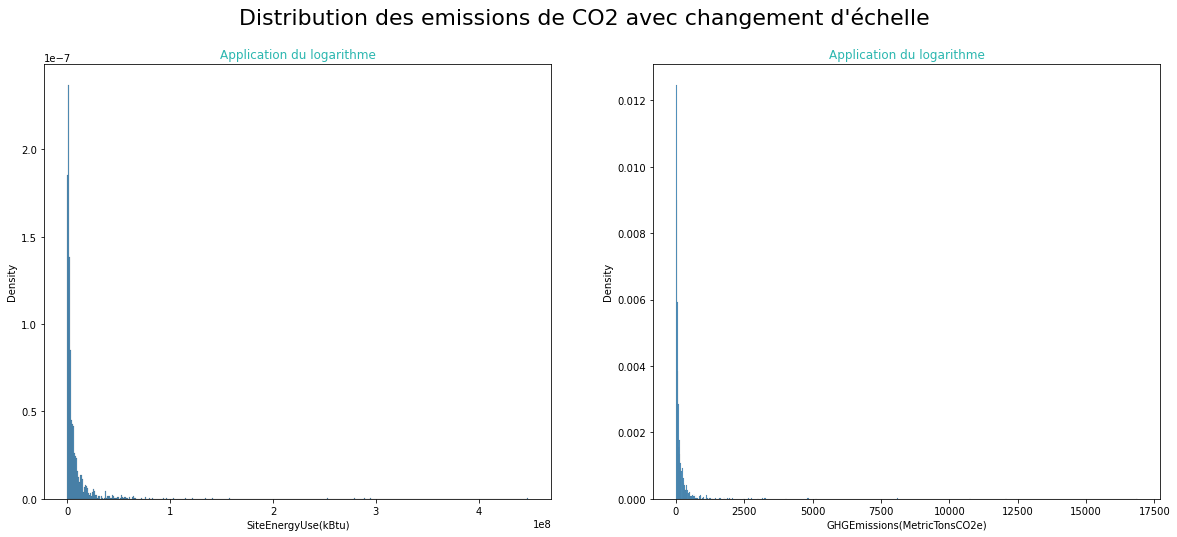

In [730]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

#Avant le passage au log
sns.histplot(data=Y, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Application du logarithme", color='#2cb7b0')
#Avant le passage au log
sns.histplot(data=Y, x='GHGEmissions(MetricTonsCO2e)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')

plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle",  fontsize=22)
plt.show()

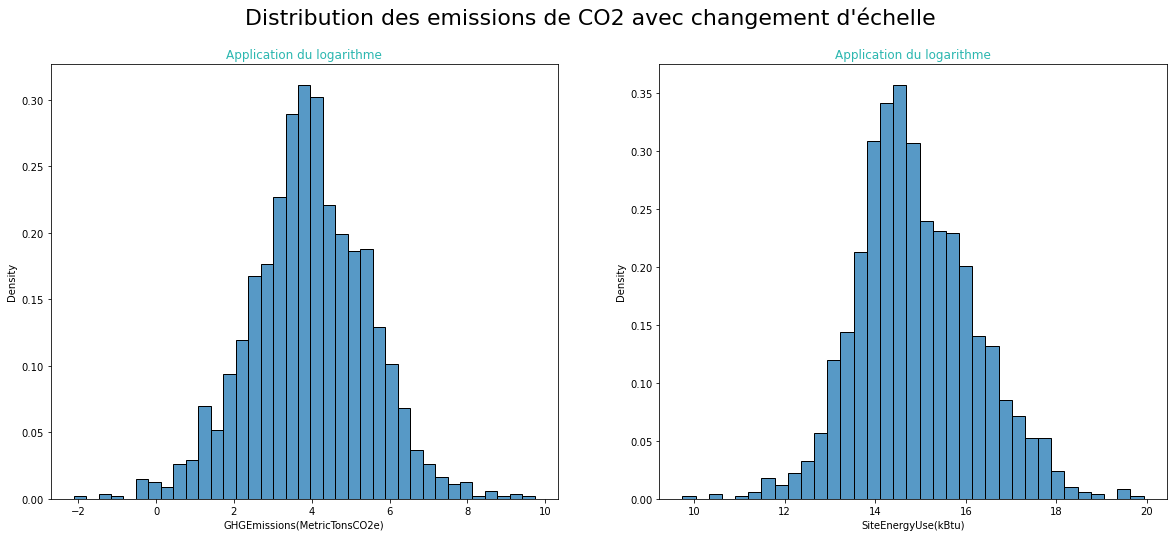

In [731]:
from sklearn.preprocessing import FunctionTransformer
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))


logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)



sns.histplot(data=Y_log, x='GHGEmissions(MetricTonsCO2e)', stat="density", ax=axes[0])
axes[0].set_title("Application du logarithme", color='#2cb7b0')


sns.histplot(data=Y_log, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')

plt.suptitle("Distributions avec changement d'échelle",  fontsize=22)
plt.show()

In [732]:
Y_log.describe()

,GHGEmissions(MetricTonsCO2e),SiteEnergyUse(kBtu)
count,1693.000000,1693.000000
mean,3.937734,14.903820
std,1.522423,1.313975
min,-2.120264,9.739759
25%,3.006178,14.015655
50%,3.918403,14.753922
75%,4.938996,15.755820
max,9.733350,19.921163


In [733]:
data[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]  = Y_log

In [734]:
print(data.shape)
data.head()

(1693, 58)


,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
325,-0.095052,-0.016385,-0.010189,16.107916,4.234251,-0.829186,-0.321464,0.450223,-0.450223,0.007310,-0.123819,-1.071110,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
400,-0.095052,0.290310,-0.076010,15.691287,3.855241,1.699998,-0.732143,-1.442480,1.442480,-0.060358,-0.365790,-1.162813,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
442,-0.095052,-0.016385,0.418244,16.634519,4.760805,0.450642,2.553287,-0.952945,0.952945,0.447764,0.316070,-0.740193,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
499,-0.095052,-0.169732,-0.188787,15.314463,4.902976,-1.408156,0.089215,-1.557555,1.557555,-0.176298,-0.171399,0.052059,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
559,-0.095052,-0.016385,0.382932,16.354152,5.424598,-0.585410,0.089215,0.450223,-0.450223,0.411462,0.279815,-0.797693,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [735]:
#Export files as modified versions:
data.to_csv("2015_2016_building_energy_benchmarking_Encoded_Scaled_Log.csv",index=True)

# <font color="#1d479b">Scores de la Cross Validation sur le train</font>

In [771]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import ast
plt.rcParams['figure.figsize'] = (7, 5) #(L,l)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv("2015_2016_building_energy_benchmarking_Encoded_Scaled_Log.csv",sep =",",index_col = "OSEBuildingID")

print(data.shape)
data.head()

(1693, 58)


,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
325,-0.095052,-0.016385,-0.010189,16.107916,4.234251,-0.829186,-0.321464,0.450223,-0.450223,0.007310,-0.123819,-1.071110,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
400,-0.095052,0.290310,-0.076010,15.691287,3.855241,1.699998,-0.732143,-1.442480,1.442480,-0.060358,-0.365790,-1.162813,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
442,-0.095052,-0.016385,0.418244,16.634519,4.760805,0.450642,2.553287,-0.952945,0.952945,0.447764,0.316070,-0.740193,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
499,-0.095052,-0.169732,-0.188787,15.314463,4.902976,-1.408156,0.089215,-1.557555,1.557555,-0.176298,-0.171399,0.052059,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
559,-0.095052,-0.016385,0.382932,16.354152,5.424598,-0.585410,0.089215,0.450223,-0.450223,0.411462,0.279815,-0.797693,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [772]:
#from sklearn import cross_validation, metrics # deprecated
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #RandomForest
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

MSE - Mean Squared Error  \
RMSE - Root Mean Squared Error\
$RMSE = \sqrt{\frac{\sum{(y_i – \hat{y_i})²}}{N}}$ 


MAE -  Mean absolute error 

$MAE = \frac{\sum{\lvert (\hat{y_i} - y_i)\rvert}}{N}$ 

R2 - Coefficient de determination SCE / SCT (ANOVA) compris entre [0,1]

$R² = 1 – \frac{\sum{(y_i – \hat{y_i})²}}{\sum{ (y_i – \bar{y})²}}$


y_i la valeur du point i \
$\hat{y_i}$ la valeur prédite \
$\bar{y}$ la moyenne empirique des points donnés.


In [913]:
data = pd.read_csv("2015_2016_building_energy_benchmarking_Encoded_Scaled_Log.csv",sep =",",index_col = "OSEBuildingID")

from sklearn.model_selection import train_test_split

X = data.drop(['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)'], axis=1) 
Y = data[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]               


XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Entrainement XTrain: {} lignes,\nTest XTest : {} lignes.\n".format(XTrain.shape[0],
                                                            XTest.shape[0]))

Entrainement XTrain: 1354 lignes,
Test XTest : 339 lignes.



LR cv_r2: -7069998162886666485760.000000 (20877800277005242990592.000000)
LR cv_mae: -4265266785.089739 (11155822851.384758)
LR cv_mse: -19257204089370603159552.000000 (57023829151180879036416.000000)
LR cv_rmse: -49563088954.150970 (129617530846.307709)
RL cv_r2: -0.011170 (0.018406)
RL cv_mae: -1.166439 (0.086432)
RL cv_mse: -2.244605 (0.339986)
RL cv_rmse: -1.493867 (0.113870)
RR cv_r2: 0.415098 (0.073282)
RR cv_mae: -0.880786 (0.061126)
RR cv_mse: -1.289441 (0.197656)
RR cv_rmse: -1.132121 (0.087995)
ENet cv_r2: 0.071212 (0.015184)
ENet cv_mae: -1.118825 (0.082366)
ENet cv_mse: -2.061894 (0.313830)
ENet cv_rmse: -1.431753 (0.109448)
SVR cv_r2: 0.456721 (0.071327)
SVR cv_mae: -0.827696 (0.064688)
SVR cv_mse: -1.199062 (0.190765)
SVR cv_rmse: -1.091298 (0.090173)
DTR cv_r2: 0.001854 (0.133334)
DTR cv_mae: -1.117690 (0.059431)
DTR cv_mse: -2.172886 (0.253348)
DTR cv_rmse: -1.476274 (0.096455)
RFR cv_r2: 0.484517 (0.071305)
RFR cv_mae: -0.818514 (0.066372)
RFR cv_mse: -1.145150 (0.2023

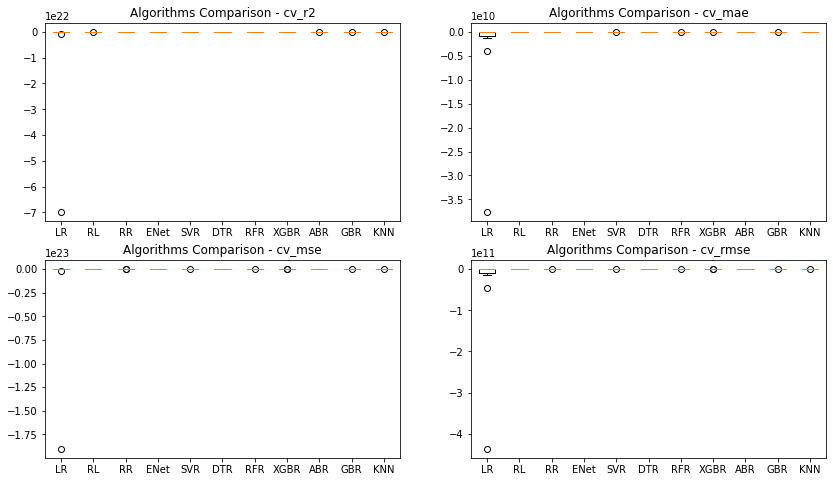

In [914]:
plt.rcParams['figure.figsize'] = (14, 8)
fig, axs = plt.subplots(2, 2)

from sklearn.svm import SVR

models = []
models.append(('LR', LinearRegression()))
models.append(('RL', linear_model.Lasso()))
models.append(('RR', Ridge()))
models.append(('ENet', ElasticNet()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('XGBR', XGBRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

# Evaluate each model in turn
result_cv_r2 = []
result_cv_mae = []
result_cv_mse = []
result_cv_rmse = []
names = []

for name, model in models:
       
    seed = 13
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
       
    cv_r2 = cross_val_score(model, XTrain,  YTrain['GHGEmissions(MetricTonsCO2e)'], cv=kfold, scoring='r2')
    cv_mae = cross_val_score(model, XTrain, YTrain['GHGEmissions(MetricTonsCO2e)'], cv=kfold, scoring='neg_mean_absolute_error')
    cv_mse = cross_val_score(model,XTrain,  YTrain['GHGEmissions(MetricTonsCO2e)'], cv=kfold, scoring='neg_mean_squared_error')
    cv_rmse = cross_val_score(model,  XTrain,  YTrain['GHGEmissions(MetricTonsCO2e)'], cv=kfold, scoring='neg_root_mean_squared_error')
                                                                 #error_score="raise" pour savoir d'ou vient l'erreur, cela vient de YTrain au lieu de YTrain['GHGEmissions(MetricTonsCO2e)']
    result_cv_r2.append(cv_r2)
    result_cv_mae.append(cv_mae)
    result_cv_mse.append(cv_mse)
    result_cv_rmse.append(cv_rmse)
    
    names.append(name)
    print('%s cv_r2: %f (%f)' % (name, cv_r2.mean(), cv_r2.std()))
    print('%s cv_mae: %f (%f)' % (name, cv_mae.mean(), cv_mae.std()))
    print('%s cv_mse: %f (%f)' % (name, cv_mse.mean(), cv_mse.std()))
    print('%s cv_rmse: %f (%f)' % (name, cv_rmse.mean(), cv_rmse.std()))
    
# Compare Algorithms
axs[0,0].boxplot(result_cv_r2, labels=names)
axs[0,0].set_title('Algorithms Comparison - cv_r2')
axs[0,1].boxplot(result_cv_mae, labels=names)
axs[0,1].set_title('Algorithms Comparison - cv_mae')
axs[1,0].boxplot(result_cv_mse, labels=names)
axs[1,0].set_title('Algorithms Comparison - cv_mse')
axs[1,1].boxplot(result_cv_rmse, labels=names)
axs[1,1].set_title('Algorithms Comparison - cv_rmse')


plt.show()

On peut voir que les plots ci-dessus sont peu lisibles, cela est dû à l'échelle des valeurs, en effet la régression linéaire possède un outlier très éloigné. Donc nous allons ploter la regression lineaire d'un coté et les autres modèles d'un autre côté.

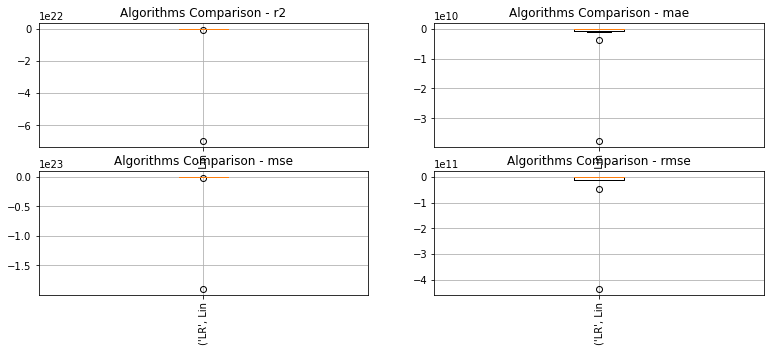

In [915]:
plt.rcParams['figure.figsize'] = (13, 5)
fig, axs = plt.subplots(2, 2)

#pour la régréssion lineaire
axs[0,0].boxplot(result_cv_r2[0:1], labels= [str(i)[0:10] for i in models[0:1]])
axs[0,0].set_title('Algorithms Comparison - r2')
axs[0,0].set_xticklabels(labels= [str(i)[0:10] for i in models[0:1]],rotation=90)
axs[0,0].grid(True)

#plt.subplot(222)
axs[0,1].boxplot(result_cv_mae[0:1],  labels= [str(i)[0:10] for i in models[0:1]])
axs[0,1].set_title('Algorithms Comparison - mae')
axs[0,1].set_xticklabels(labels= [str(i)[0:10] for i in models[0:1]],rotation=90)
axs[0,1].grid(True)

#plt.subplot(222)
axs[1,0].boxplot(result_cv_mse[0:1], labels= [str(i)[0:10] for i in models[0:1]])
axs[1,0].set_title('Algorithms Comparison - mse')
axs[1,0].set_xticklabels(labels= [str(i)[0:10] for i in models[0:1]],rotation=90)
axs[1,0].grid(True)

#plt.subplot(222)
axs[1,1].boxplot(result_cv_rmse[0:1], labels= [str(i)[0:10] for i in models[0:1]])
axs[1,1].set_title('Algorithms Comparison - rmse')
axs[1,1].set_xticklabels(labels= [str(i)[0:10] for i in models[0:1]],rotation=90)
axs[1,1].grid(True)

plt.show()


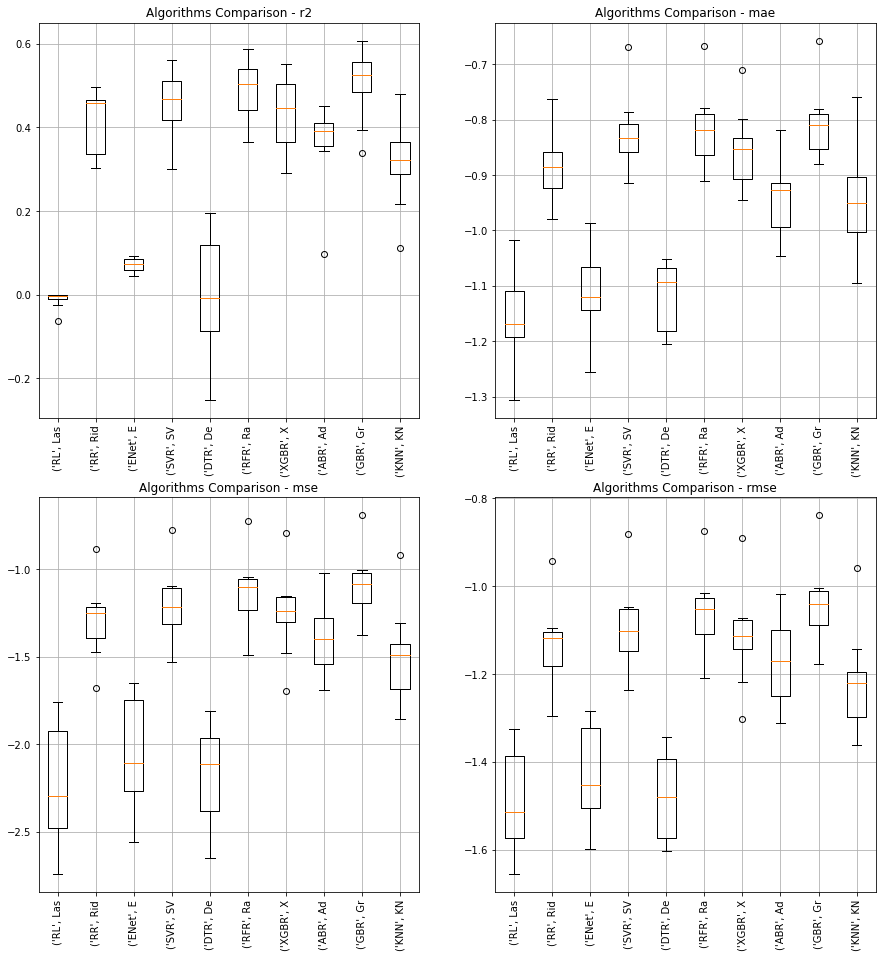

In [916]:
plt.rcParams['figure.figsize'] = (15, 16)
fig, axs = plt.subplots(2, 2)


axs[0,0].boxplot(result_cv_r2[1:12], labels= [str(i)[0:10] for i in models[1:12]])
axs[0,0].set_title('Algorithms Comparison - r2')
axs[0,0].set_xticklabels(labels= [str(i)[0:10] for i in models[1:12]],rotation=90)
axs[0,0].grid(True)

axs[0,1].boxplot(result_cv_mae[1:12], labels= [str(i)[0:10] for i in models[1:12]])
axs[0,1].set_title('Algorithms Comparison - mae')
axs[0,1].set_xticklabels(labels= [str(i)[0:10] for i in models[1:12]],rotation=90)
axs[0,1].grid(True)


axs[1,0].boxplot(result_cv_mse[1:12], labels= [str(i)[0:10] for i in models[1:12]])
axs[1,0].set_title('Algorithms Comparison - mse')
axs[1,0].set_xticklabels(labels= [str(i)[0:10] for i in models[1:12]],rotation=90)
axs[1,0].grid(True)


axs[1,1].boxplot(result_cv_rmse[1:12], labels= [str(i)[0:10] for i in models[1:12]])
axs[1,1].set_title('Algorithms Comparison - rmse')
axs[1,1].set_xticklabels(labels= [str(i)[0:10] for i in models[1:12]],rotation=90)
axs[1,1].grid(True)

plt.show()

On peut voir que la cross validation donne un résultat peu interprétable pour la régression linéaire. Les box plots sont très peu visibles. Entre les différentes mesures, pour la prévision de la variables `GHGEmissions(MetricTonsCO2e)` les meilleurs modèles sont:
* R2 :GBR - Gradient Boosting Regressor
* MAE: GBR - Gradient Boosting Regressor
* MSE:  GBR - Gradient Boosting Regressor
* RMSE:  GBR - Gradient Boosting Regressor

Ensuite, on procède de la même façon pour la variable Y `SiteEnergyUse(kBtu)`.

LR cv_r2: -4560709204738055340032.000000 (13616072042497802502144.000000)
LR cv_mae: -2840281586.953209 (7863381704.830017)
LR cv_mse: -9436518884618258087936.000000 (28193207906090365222912.000000)
LR cv_rmse: -33003138869.801258 (91363623556.418076)
RL cv_r2: -0.010561 (0.015765)
RL cv_mae: -1.024434 (0.083115)
RL cv_mse: -1.669804 (0.280036)
RL cv_rmse: -1.287556 (0.109562)
RR cv_r2: 0.575066 (0.060439)
RR cv_mae: -0.628041 (0.053046)
RR cv_mse: -0.696544 (0.130014)
RR cv_rmse: -0.831047 (0.076837)
ENet cv_r2: 0.153301 (0.023829)
ENet cv_mae: -0.945510 (0.079919)
ENet cv_mse: -1.399720 (0.242403)
ENet cv_rmse: -1.178601 (0.103058)
SVR cv_r2: 0.656154 (0.049565)
SVR cv_mae: -0.558238 (0.059218)
SVR cv_mse: -0.563605 (0.104576)
SVR cv_rmse: -0.747590 (0.068658)
DTR cv_r2: 0.432258 (0.080152)
DTR cv_mae: -0.723411 (0.060482)
DTR cv_mse: -0.944576 (0.149203)
DTR cv_rmse: -0.974564 (0.094879)
RFR cv_r2: 0.679933 (0.056193)
RFR cv_mae: -0.537206 (0.052428)
RFR cv_mse: -0.521999 (0.120710)

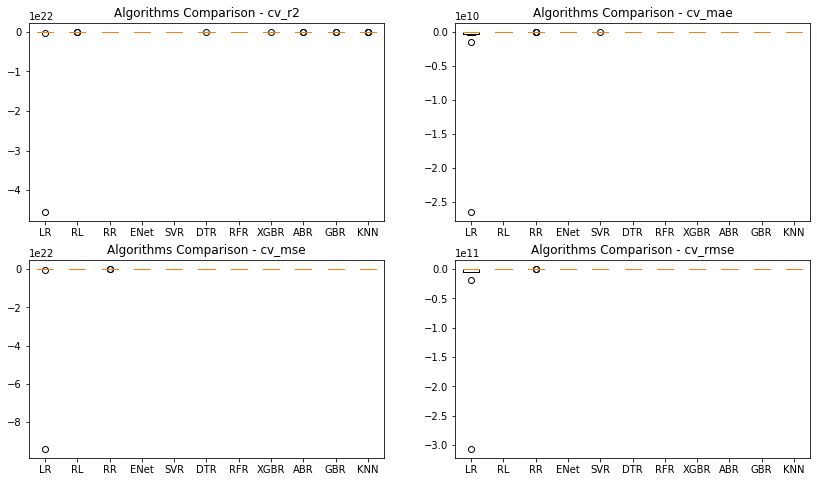

In [917]:
plt.rcParams['figure.figsize'] = (14, 8)
fig, axs = plt.subplots(2, 2)
from sklearn.svm import SVR

models = []
models.append(('LR', LinearRegression()))
models.append(('RL', linear_model.Lasso()))
models.append(('RR', Ridge()))
models.append(('ENet', ElasticNet()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('XGBR', XGBRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

# Evaluate each model in turn
result_cv_r2 = []
result_cv_mae = []
result_cv_mse = []
result_cv_rmse = []
names = []

for name, model in models:
       
    seed = 13
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
       
    cv_r2 = cross_val_score(model, XTrain,  YTrain['SiteEnergyUse(kBtu)'], cv=kfold, scoring='r2')
    cv_mae = cross_val_score(model, XTrain, YTrain['SiteEnergyUse(kBtu)'], cv=kfold, scoring='neg_mean_absolute_error')
    cv_mse = cross_val_score(model,XTrain,  YTrain['SiteEnergyUse(kBtu)'], cv=kfold, scoring='neg_mean_squared_error')
    cv_rmse = cross_val_score(model,  XTrain,  YTrain['SiteEnergyUse(kBtu)'], cv=kfold, scoring='neg_root_mean_squared_error')
                                                                 #error_score="raise" pour savoir d'ou vient l'erreur, cela vient de YTrain au lieu de YTrain['GHGEmissions(MetricTonsCO2e)']
    result_cv_r2.append(cv_r2)
    result_cv_mae.append(cv_mae)
    result_cv_mse.append(cv_mse)
    result_cv_rmse.append(cv_rmse)
    
    names.append(name)
    print('%s cv_r2: %f (%f)' % (name, cv_r2.mean(), cv_r2.std()))
    print('%s cv_mae: %f (%f)' % (name, cv_mae.mean(), cv_mae.std()))
    print('%s cv_mse: %f (%f)' % (name, cv_mse.mean(), cv_mse.std()))
    print('%s cv_rmse: %f (%f)' % (name, cv_rmse.mean(), cv_rmse.std()))
    
# Compare Algorithms
axs[0,0].boxplot(result_cv_r2, labels=names)
axs[0,0].set_title('Algorithms Comparison - cv_r2')
axs[0,1].boxplot(result_cv_mae, labels=names)
axs[0,1].set_title('Algorithms Comparison - cv_mae')
axs[1,0].boxplot(result_cv_mse, labels=names)
axs[1,0].set_title('Algorithms Comparison - cv_mse')
axs[1,1].boxplot(result_cv_rmse, labels=names)
axs[1,1].set_title('Algorithms Comparison - cv_rmse')


plt.show()

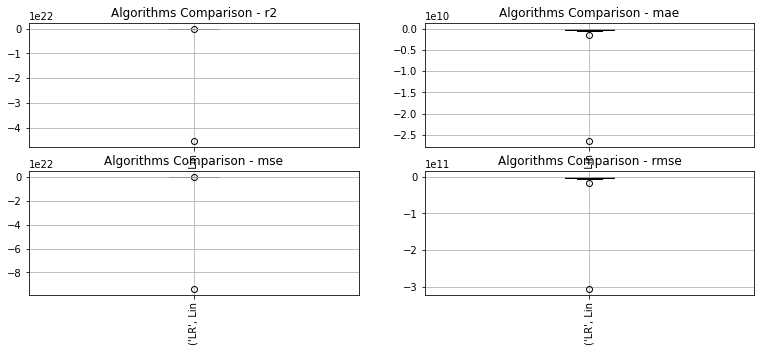

In [918]:
plt.rcParams['figure.figsize'] = (13, 5)
fig, axs = plt.subplots(2, 2)

#pour la régréssion lineaire
axs[0,0].boxplot(result_cv_r2[0:1], labels= [str(i)[0:10] for i in models[0:1]])
axs[0,0].set_title('Algorithms Comparison - r2')
axs[0,0].set_xticklabels(labels= [str(i)[0:10] for i in models[0:1]],rotation=90)
axs[0,0].grid(True)

#plt.subplot(222)
axs[0,1].boxplot(result_cv_mae[0:1],  labels= [str(i)[0:10] for i in models[0:1]])
axs[0,1].set_title('Algorithms Comparison - mae')
axs[0,1].set_xticklabels(labels= [str(i)[0:10] for i in models[0:1]],rotation=90)
axs[0,1].grid(True)

#plt.subplot(222)
axs[1,0].boxplot(result_cv_mse[0:1], labels= [str(i)[0:10] for i in models[0:1]])
axs[1,0].set_title('Algorithms Comparison - mse')
axs[1,0].set_xticklabels(labels= [str(i)[0:10] for i in models[0:1]],rotation=90)
axs[1,0].grid(True)

#plt.subplot(222)
axs[1,1].boxplot(result_cv_rmse[0:1], labels= [str(i)[0:10] for i in models[0:1]])
axs[1,1].set_title('Algorithms Comparison - rmse')
axs[1,1].set_xticklabels(labels= [str(i)[0:10] for i in models[0:1]],rotation=90)
axs[1,1].grid(True)

plt.show()

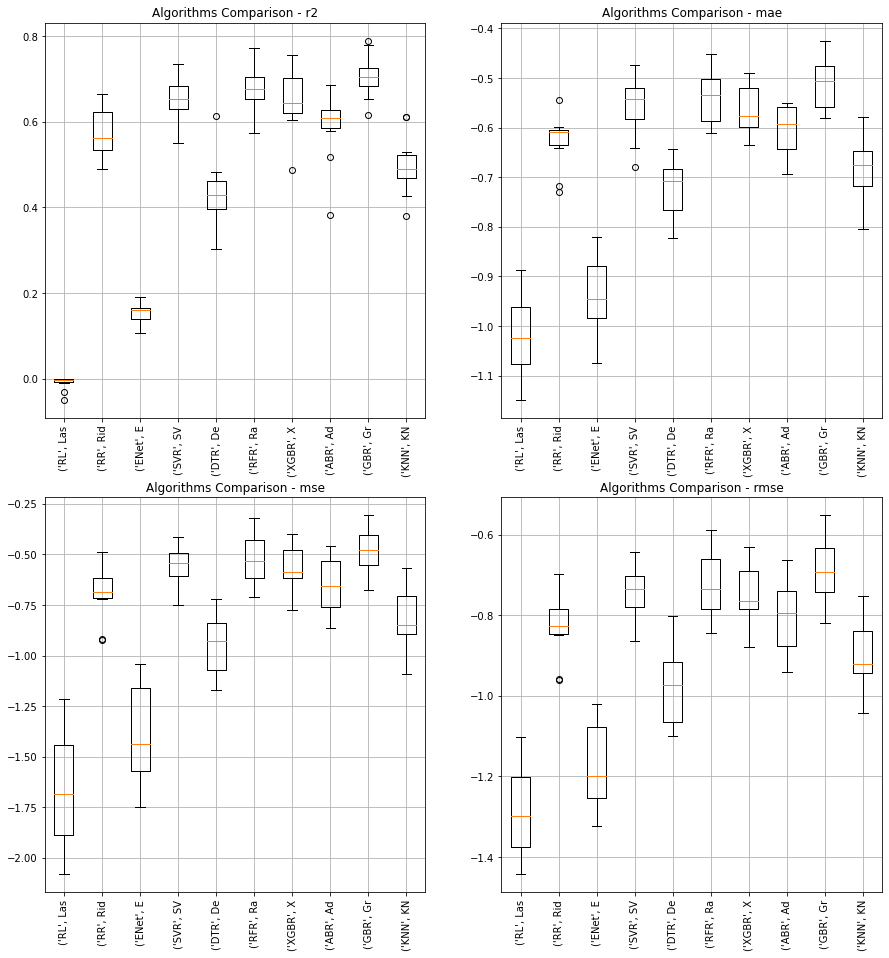

In [919]:
plt.rcParams['figure.figsize'] = (15, 16)
fig, axs = plt.subplots(2, 2)


axs[0,0].boxplot(result_cv_r2[1:12], labels= [str(i)[0:10] for i in models[1:12]])
axs[0,0].set_title('Algorithms Comparison - r2')
axs[0,0].set_xticklabels(labels= [str(i)[0:10] for i in models[1:12]],rotation=90)
axs[0,0].grid(True)

axs[0,1].boxplot(result_cv_mae[1:12], labels= [str(i)[0:10] for i in models[1:12]])
axs[0,1].set_title('Algorithms Comparison - mae')
axs[0,1].set_xticklabels(labels= [str(i)[0:10] for i in models[1:12]],rotation=90)
axs[0,1].grid(True)


axs[1,0].boxplot(result_cv_mse[1:12], labels= [str(i)[0:10] for i in models[1:12]])
axs[1,0].set_title('Algorithms Comparison - mse')
axs[1,0].set_xticklabels(labels= [str(i)[0:10] for i in models[1:12]],rotation=90)
axs[1,0].grid(True)


axs[1,1].boxplot(result_cv_rmse[1:12], labels= [str(i)[0:10] for i in models[1:12]])
axs[1,1].set_title('Algorithms Comparison - rmse')
axs[1,1].set_xticklabels(labels= [str(i)[0:10] for i in models[1:12]],rotation=90)
axs[1,1].grid(True)

plt.show()

Entre les différentes mesures, pour la prévision de la variable `SiteEnergyUse(kBtu)` les meilleurs modèles sont:
* R2 :GBR - Gradient Boosting Regressor
* MAE: GBR - Gradient Boosting Regressor
* MSE:  GBR - Gradient Boosting Regressor
* RMSE:  GBR - Gradient Boosting Regressor

Pour les deux variables à prédire nous obtenons comme modèle  **GBR - Gradient Boosting Regressor**. **<font color="green">Nous allons donc séléctionner le modèle Gradient Boosting Regressor pour prédire la variable SiteEnergyUse et GHGEmissions(MetricTonsCO2e)</font>**

# <font color="#1d479b">Performance entre le train et le test</font>

In [953]:
data = pd.read_csv("2015_2016_building_energy_benchmarking_Encoded_Scaled_Log.csv",sep =",",index_col = "OSEBuildingID")

from sklearn.model_selection import train_test_split

X = data.drop(['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)'], axis=1) 
Y = data[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]               


XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Entrainement XTrain: {} lignes,\nTest XTest : {} lignes.\n".format(XTrain.shape[0],
                                                            XTest.shape[0]))

Entrainement XTrain: 1354 lignes,
Test XTest : 339 lignes.



In [954]:
from sklearn.svm import SVR

models = []
models.append(('LR', LinearRegression()))
models.append(('RL', linear_model.Lasso()))
models.append(('RR', Ridge()))
models.append(('ENet', ElasticNet()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('XGBR', XGBRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

names = []

#metrics
result_MAE_train = []
result_MAE_test = []
result_RMSE_train = []
result_RMSE_test = []
result_MSE_train= []
result_MSE_test = []
result_R2_train = []
result_R2_test = []


dict_YTest_pred = {}

def modelfit(alg, XTrain, YTrain, XTest,YTest, filename):


    [alg.fit(XTrain, YTrain, early_stopping_rounds=5, eval_set=[(XTest, YTest)], \
             verbose=False) if alg is XGBRegressor() else alg.fit(XTrain, YTrain) ]
    
    #Predict on train and metrics 
    YTrain_pred = alg.predict(XTrain)
    
    MAE_train = mean_absolute_error(YTrain_pred, YTrain)
    R2_train = metrics.r2_score((YTrain).values, YTrain_pred) 
    RMSE_train = metrics.mean_squared_error((YTrain).values, YTrain_pred, squared = False)
    MSE_train = metrics.mean_squared_error((YTrain).values, YTrain_pred, squared = True)
    
    #Predict on test and metrics
    YTest_pred  = alg.predict(XTest)   #numpy.ndarray'
    YTest_pred = pd.Series(YTest_pred) #series
    
    MAE_test = mean_absolute_error(YTest_pred, YTest)
    R2_test= metrics.r2_score((YTest).values, YTest_pred) 
    RMSE_test = metrics.mean_squared_error((YTest).values, YTest_pred, squared = False)
    MSE_test = metrics.mean_squared_error((YTest).values, YTest_pred, squared = True) #If True returns MSE value
    
    
    #store metrics
    result_MAE_train.append(MAE_train)
    result_MAE_test.append(MAE_test)
    result_RMSE_train.append(RMSE_train)   
    result_RMSE_test.append(RMSE_test)
    result_MSE_train.append(MSE_train)   
    result_MSE_test.append(MSE_test)
    result_R2_train.append(R2_train)
    result_R2_test.append(R2_test)
    
    dict_YTest_pred[str(alg)[:10]] = YTest_pred
    
    #Print model report sur le test set
    print("\nModel Report on test set {}".format(str(alg)[:10]))
    print("MAE : " + str(MAE_test))
    print("R2 : %.4g" % R2_test)
    print("RMSE : %.4g" % RMSE_test)
    print("MSE : %.4g" % MSE_test)
    
   
    #YTest_pred to csv 
    submission = pd.DataFrame({'OSEBuildingID':YTest.index, 'GHGEmissions(MetricTonsCO2e)':YTest_pred.values})
    submission.to_csv(filename, index=False)
    
for name, model in models:    

    modelfit(model, XTrain, YTrain['GHGEmissions(MetricTonsCO2e)'], XTest, YTest['GHGEmissions(MetricTonsCO2e)'], '{}_GHGEmissions(MetricTonsCO2e).csv'.format(str(model)[:10]))
    



Model Report on test set LinearRegr
MAE : 11201378398.968777
R2 : -1.625e+22
RMSE : 2.062e+11
MSE : 4.253e+22

Model Report on test set Lasso()
MAE : 1.2461858074832495
R2 : -0.002322
RMSE : 1.62
MSE : 2.623

Model Report on test set Ridge()
MAE : 0.925242323623313
R2 : 0.3045
RMSE : 1.349
MSE : 1.82

Model Report on test set ElasticNet
MAE : 1.18826873743866
R2 : 0.08825
RMSE : 1.545
MSE : 2.386

Model Report on test set SVR()
MAE : 0.8311039130424523
R2 : 0.5124
RMSE : 1.13
MSE : 1.276

Model Report on test set DecisionTr
MAE : 1.0366493297426442
R2 : 0.2428
RMSE : 1.408
MSE : 1.982

Model Report on test set RandomFore
MAE : 0.799825437236905
R2 : 0.5417
RMSE : 1.095
MSE : 1.199

Model Report on test set XGBRegress
MAE : 0.8810260205425604
R2 : 0.4644
RMSE : 1.184
MSE : 1.402

Model Report on test set AdaBoostRe
MAE : 0.9132645952089791
R2 : 0.4757
RMSE : 1.171
MSE : 1.372

Model Report on test set GradientBo
MAE : 0.8162904721223924
R2 : 0.5375
RMSE : 1.1
MSE : 1.21

Model Report o

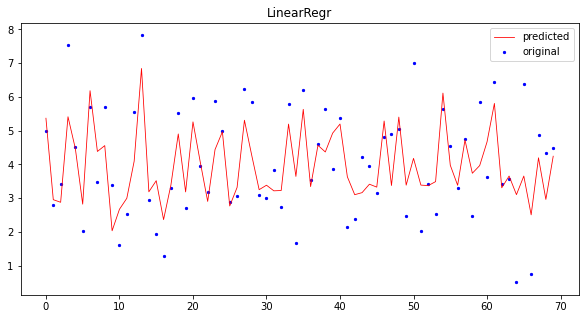

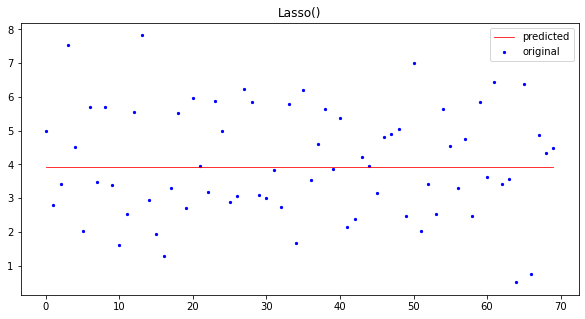

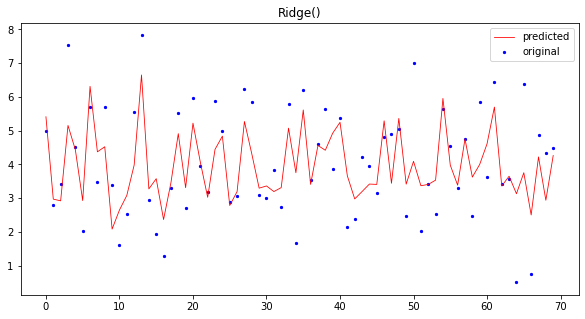

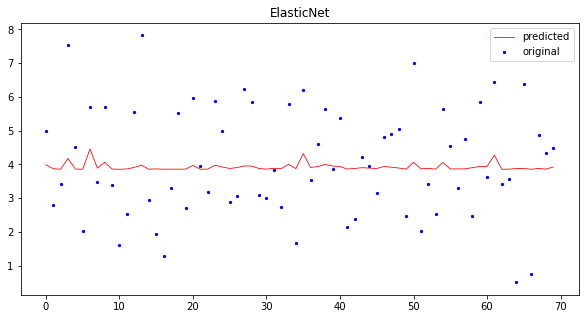

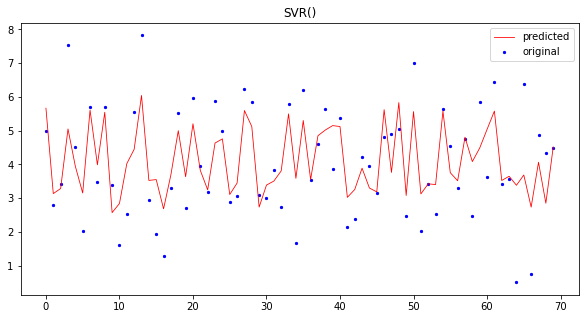

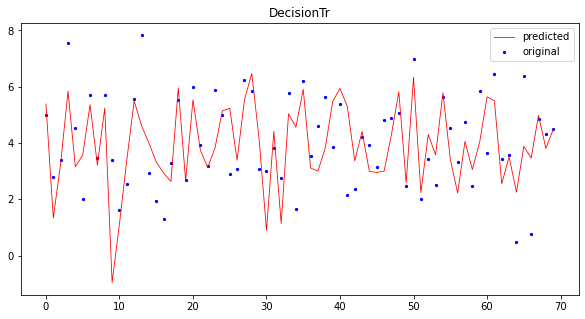

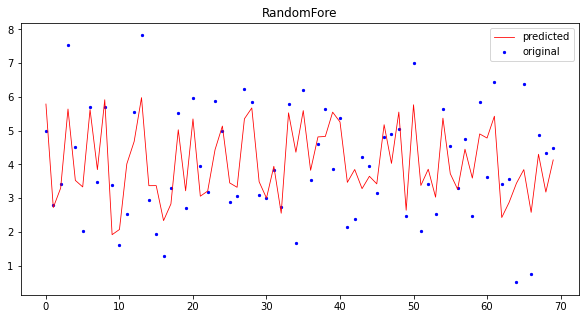

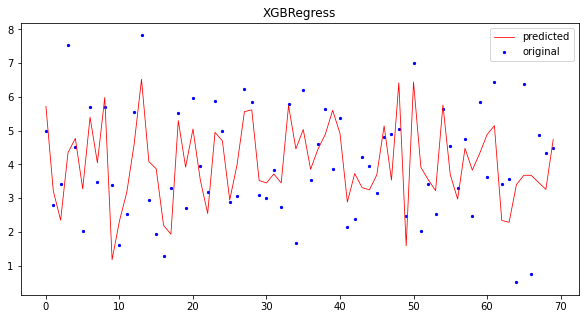

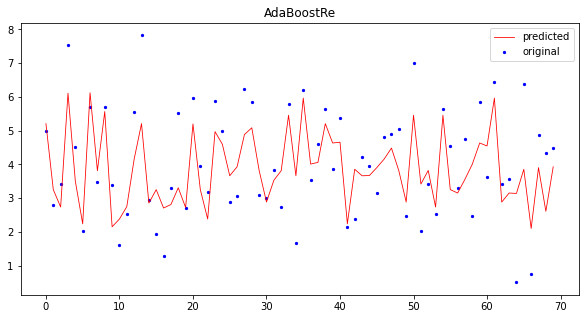

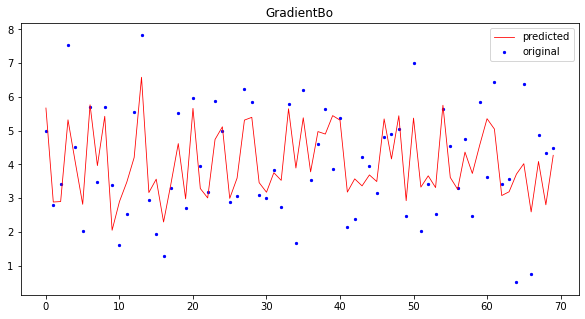

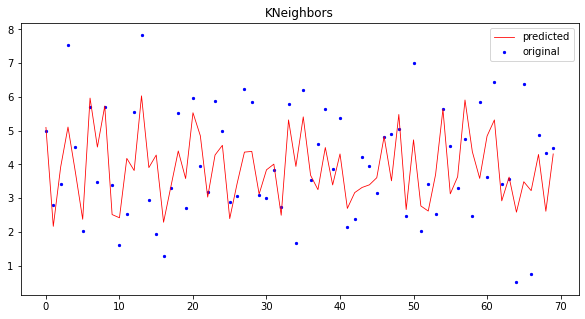

In [958]:
plt.rcParams['figure.figsize'] = (10,5)
#https://www.datatechnotes.com/2019/09/how-to-use-gridsearchcv-in-python.html
for k,v in dict_YTest_pred.items():
    #print(k)

    x_ax = range(len(v[0:70]))
    plt.scatter(x_ax, YTest['GHGEmissions(MetricTonsCO2e)'][0:70], s=5, color="blue", label="original")
    plt.plot(x_ax, v[0:70], lw=0.8, color="red", label="predicted")
    plt.legend()
    plt.title('{}'.format(k))
    plt.show()

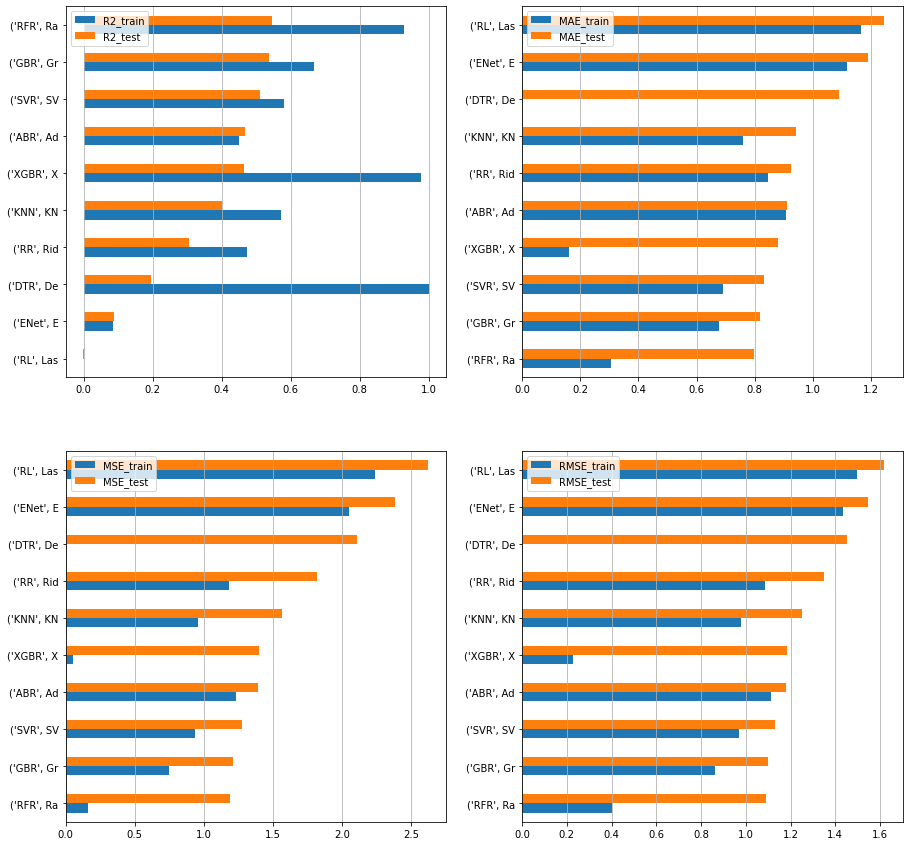

In [909]:
#https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.plot.barh.html
fig = plt.figure(figsize=(15, 15))

# Create subplot axes
ax1 = fig.add_subplot(2, 2, 1)  # (nb lignes, nb colonnes, position)
ax2 = fig.add_subplot(2, 2, 2)  
ax3 = fig.add_subplot(2, 2, 3)  
ax4 = fig.add_subplot(2, 2, 4)  


# R2
df_R2 = pd.DataFrame({'R2_train': result_R2_train[1:11], 'R2_test': result_R2_test[1:11]},index =  [str(i)[0:10] for i in models[1:11]])
df_R2 = df_R2.sort_values(by='R2_test',ascending=True)
ax1 = df_R2.plot(kind="barh", ax=ax1)
ax1.legend(loc= "upper left") #locs = ["upper left", "lower left", "center left"

# MAE
df_R2 = pd.DataFrame({'MAE_train': result_MAE_train[1:11], 'MAE_test': result_MAE_test[1:11]},index =  [str(i)[0:10] for i in models[1:11]])
df_R2 = df_R2.sort_values(by='MAE_test',ascending=True)
ax2= df_R2.plot(kind="barh", ax=ax2)
ax2.legend(loc= "upper left")

# MSE
df_R2 = pd.DataFrame({'MSE_train': result_MSE_train[1:11], 'MSE_test': result_MSE_test[1:11]},index =  [str(i)[0:10] for i in models[1:11]])
df_R2 = df_R2.sort_values(by='MSE_test',ascending=True)
ax3= df_R2.plot(kind="barh", ax=ax3)
ax3.legend(loc= "upper left")


# RMSE
df_R2 = pd.DataFrame({'RMSE_train': result_RMSE_train[1:11], 'RMSE_test': result_RMSE_test[1:11]},index =  [str(i)[0:10] for i in models[1:11]])
df_R2 = df_R2.sort_values(by='RMSE_test',ascending=True)
ax4= df_R2.plot(kind="barh", ax=ax4)
ax4.legend(loc= "upper left")


for axis in (ax1, ax2, ax3, ax4):
    axis.grid(axis='x')

Pour le R2, lorsque R2_test < R2_train cela signifie que le modèle ne généralise pas bien assez. Symétriquement, lorsque RMSE test > RMSE train, le modèle est alors en overfitting sur le train set. Lors de ces tests et de ces verifications de performance, on observe pour chacune des métrics les conclusions suivantes pour `GHGEmissions(MetricTonsCO2e)` :
* R2 : ABR - AdaBoost Regressor car R2_test > R2_train
* MAE : ABR - AdaBoost Regressor car l'écart entre le train et test est le plus petit
* MSE : ABR - AdaBoost Regressor car l'écart entre le train et test est le plus petit
* RMSE : ABR - AdaBoost Regressor car l'écart entre le train et test est le plus petit

On observe que le lasso est peu interprétable car son R2 est négatif. Par ailleurs, on a retiré la régression lineaire car son échelle de valeurs aurait masqué les resultats sur les graphiques. Comme vu précedmment, la régression linéaire est peu interprétable.

source: https://stats.stackexchange.com/questions/297184/why-the-rmse-of-training-is-very-small-but-the-test-error-is-very-big

Une fois les résultats obtenus pour la variable `GHGEmissions(MetricTonsCO2e)`, on fait repète le même procédé pour la variable `SiteEnergyUse(kBtu)`. 

In [959]:
data = pd.read_csv("2015_2016_building_energy_benchmarking_Encoded_Scaled_Log.csv",sep =",",index_col = "OSEBuildingID")

from sklearn.model_selection import train_test_split

X = data.drop(['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)'], axis=1) 
Y = data[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]               


XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Entrainement XTrain: {} lignes,\nTest XTest : {} lignes.\n".format(XTrain.shape[0],
                                                            XTest.shape[0]))

Entrainement XTrain: 1354 lignes,
Test XTest : 339 lignes.



In [960]:
from sklearn.svm import SVR

models = []
models.append(('LR', LinearRegression()))
models.append(('RL', linear_model.Lasso()))
models.append(('RR', Ridge()))
models.append(('ENet', ElasticNet()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('XGBR', XGBRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

names = []

#metrics
result_MAE_train = []
result_MAE_test = []
result_RMSE_train = []
result_RMSE_test = []
result_MSE_train= []
result_MSE_test = []
result_R2_train = []
result_R2_test = []


dict_YTest_pred = {}

for name, model in models:    

    modelfit(model, XTrain, YTrain['SiteEnergyUse(kBtu)'], XTest, YTest['SiteEnergyUse(kBtu)'], '{}_SiteEnergyUse(kBtu).csv'.format(str(model)[:10]))
    



Model Report on test set LinearRegr
MAE : 1182906134.515244
R2 : -2.435e+20
RMSE : 2.178e+10
MSE : 4.744e+20

Model Report on test set Lasso()
MAE : 1.0868740798048828
R2 : -0.00889
RMSE : 1.402
MSE : 1.965

Model Report on test set Ridge()
MAE : 0.6803889462162322
R2 : 0.4336
RMSE : 1.05
MSE : 1.103

Model Report on test set ElasticNet
MAE : 0.9973591549554827
R2 : 0.1635
RMSE : 1.276
MSE : 1.629

Model Report on test set SVR()
MAE : 0.5449558185191027
R2 : 0.6922
RMSE : 0.7743
MSE : 0.5995

Model Report on test set DecisionTr
MAE : 0.727866651370821
R2 : 0.4984
RMSE : 0.9884
MSE : 0.9769

Model Report on test set RandomFore
MAE : 0.5321502233640818
R2 : 0.7044
RMSE : 0.7588
MSE : 0.5758

Model Report on test set XGBRegress
MAE : 0.5481139240978011
R2 : 0.7075
RMSE : 0.7548
MSE : 0.5697

Model Report on test set AdaBoostRe
MAE : 0.5852630249051511
R2 : 0.6527
RMSE : 0.8225
MSE : 0.6765

Model Report on test set GradientBo
MAE : 0.502350705374479
R2 : 0.7261
RMSE : 0.7304
MSE : 0.5335

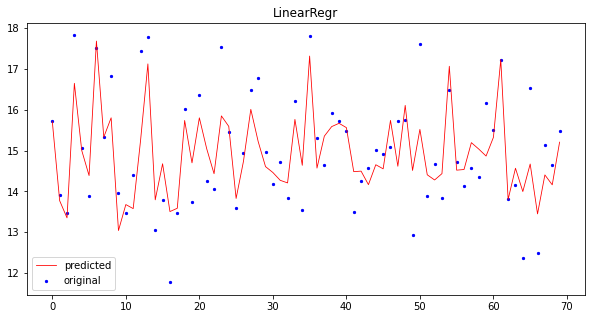

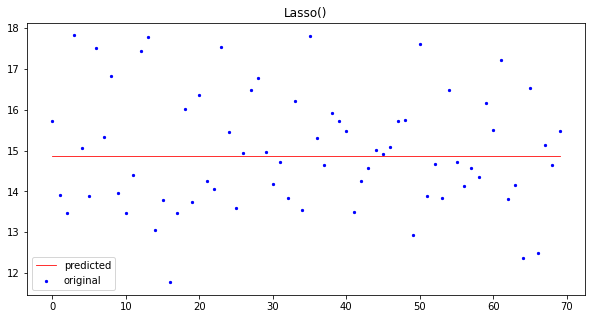

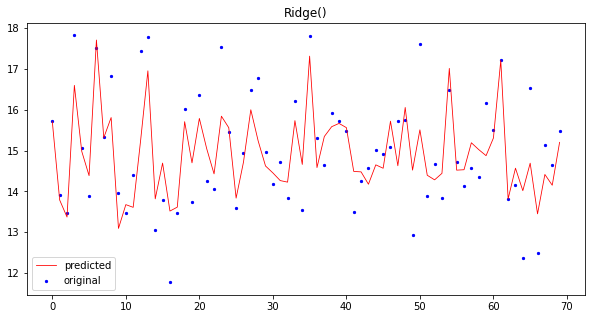

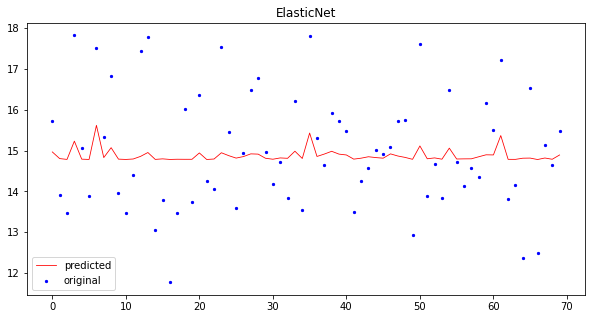

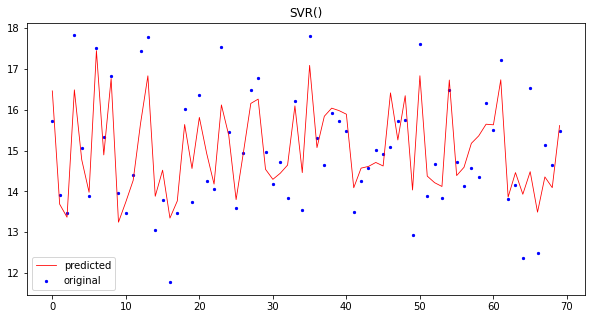

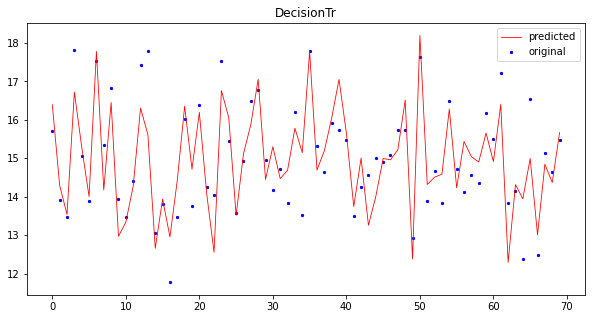

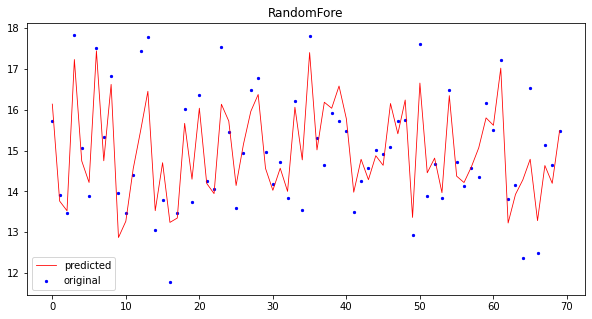

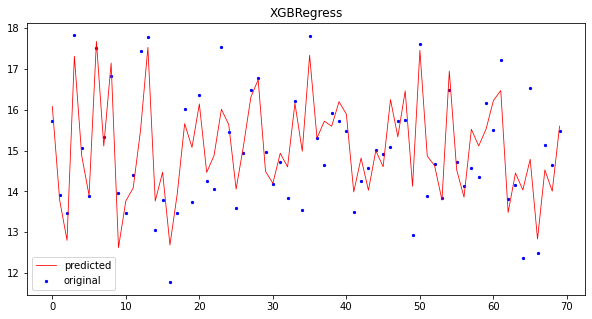

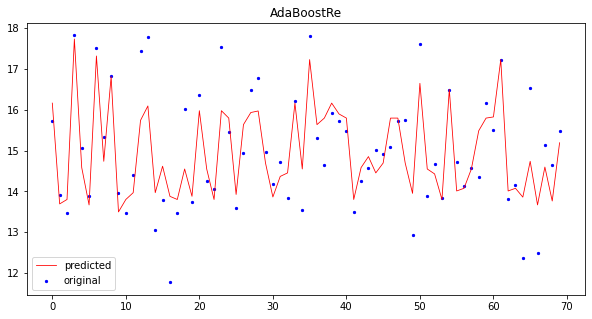

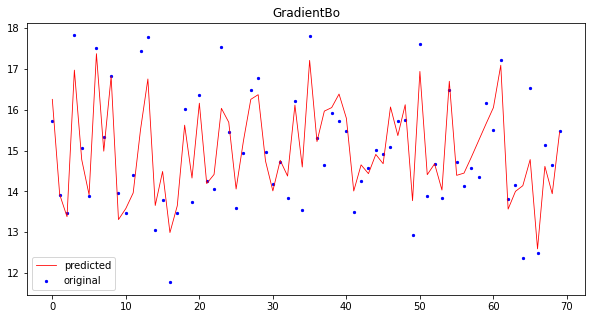

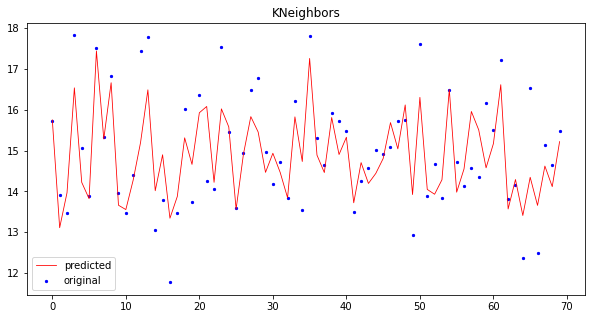

In [961]:
plt.rcParams['figure.figsize'] = (10,5)
#https://www.datatechnotes.com/2019/09/how-to-use-gridsearchcv-in-python.html
for k,v in dict_YTest_pred.items():
    #print(k)

    x_ax = range(len(v[0:70]))
    plt.scatter(x_ax, YTest['SiteEnergyUse(kBtu)'][0:70], s=5, color="blue", label="original")
    plt.plot(x_ax, v[0:70], lw=0.8, color="red", label="predicted")
    plt.legend()
    plt.title('{}'.format(k))
    plt.show()

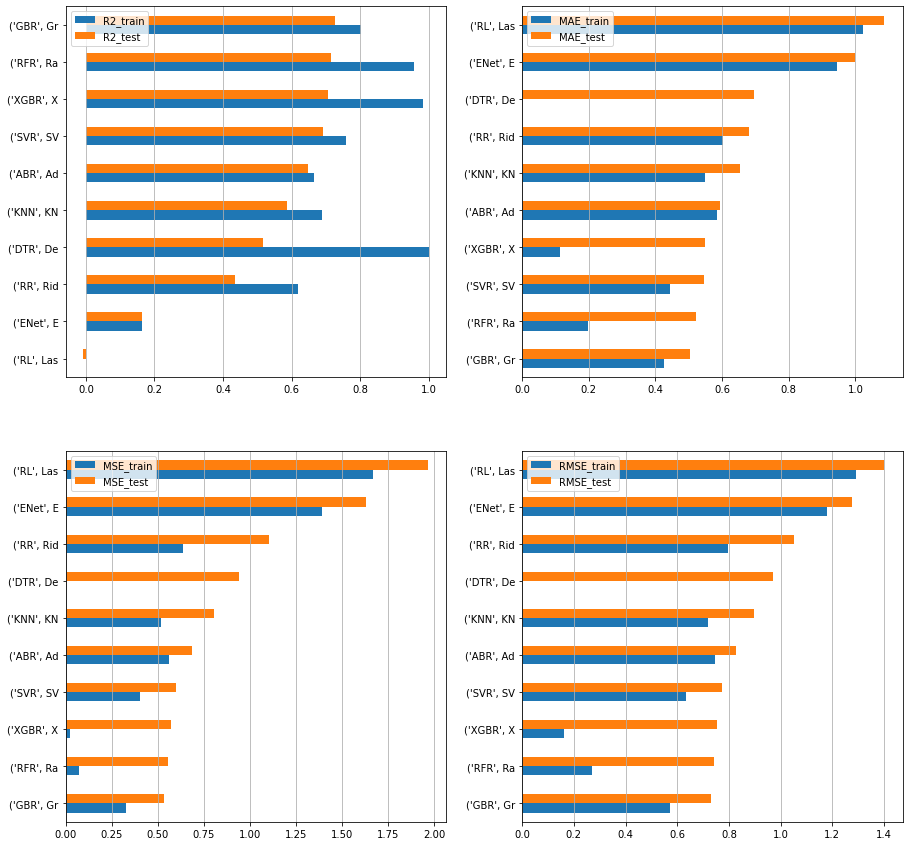

In [912]:
#https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.plot.barh.html

fig = plt.figure(figsize=(15, 15))

# Create subplot axes
ax1 = fig.add_subplot(2, 2, 1)  # (nb lignes, nb colonnes, position)
ax2 = fig.add_subplot(2, 2, 2)  
ax3 = fig.add_subplot(2, 2, 3)  
ax4 = fig.add_subplot(2, 2, 4)  


# R2
df_R2 = pd.DataFrame({'R2_train': result_R2_train[1:11], 'R2_test': result_R2_test[1:11]},index =  [str(i)[0:10] for i in models[1:11]])
df_R2 = df_R2.sort_values(by='R2_test',ascending=True)
ax1 = df_R2.plot(kind="barh", ax=ax1)
ax1.legend(loc= "upper left") #locs = ["upper left", "lower left", "center left"

# MAE
df_R2 = pd.DataFrame({'MAE_train': result_MAE_train[1:11], 'MAE_test': result_MAE_test[1:11]},index =  [str(i)[0:10] for i in models[1:11]])
df_R2 = df_R2.sort_values(by='MAE_test',ascending=True)
ax2= df_R2.plot(kind="barh", ax=ax2)
ax2.legend(loc= "upper left")

# MSE
df_R2 = pd.DataFrame({'MSE_train': result_MSE_train[1:11], 'MSE_test': result_MSE_test[1:11]},index =  [str(i)[0:10] for i in models[1:11]])
df_R2 = df_R2.sort_values(by='MSE_test',ascending=True)
ax3= df_R2.plot(kind="barh", ax=ax3)
ax3.legend(loc= "upper left")


# RMSE
df_R2 = pd.DataFrame({'RMSE_train': result_RMSE_train[1:11], 'RMSE_test': result_RMSE_test[1:11]},index =  [str(i)[0:10] for i in models[1:11]])
df_R2 = df_R2.sort_values(by='RMSE_test',ascending=True)
ax4= df_R2.plot(kind="barh", ax=ax4)
ax4.legend(loc= "upper left")


for axis in (ax1, ax2, ax3, ax4):
    axis.grid(axis='x')

Pour le R2, lorsque R2_test < R2_train cela signifie que le modèle ne généralise pas bien assez. Symétriquement, lorsque RMSE test > RMSE train, le modèle est alors en overfitting sur le train set. Lors de ces tests et de ces verifications de performance, on observe pour chacune des métrics les conclusions suivantes pour la variable à prédire `SiteEnergyUse(kBtu)`:
* R2 : ABR - AdaBoost Regressor car l'écart entre le train et test est le plus petit tout en ayant un R2 pas trop faible
* MAE : ABR - AdaBoost Regressor car l'écart entre le train et test est le plus petit
* MSE : ABR - AdaBoost Regressor car l'écart entre le train et test est le plus petit
* RMSE : ABR - AdaBoost Regressor car l'écart entre le train et test est le plus petit tout en ayant un RMSE pas trop élevé.

En conclusion, même si le GBR obtient de bons résultats, il faut tout de même prendre en condération la complexité du modèle rendant celui-ci moins géneralisable aux nouvelles données. Pour ne pas choisir les extrêmes, j'opterai un modèle qui soit le plus genéralisable possible avec des performances satisfaisantes. 

 **<font color="green">Nous allons donc séléctionner le modèle AdaBoost Regressor pour prédire la variable SiteEnergyUse et GHGEmissions(MetricTonsCO2e)</font>**


# <font color="#1d479b">Importance des variables</font>

In [946]:
data = pd.read_csv("2015_2016_building_energy_benchmarking_Encoded_Scaled_Log.csv",sep =",",index_col = "OSEBuildingID")

from sklearn.model_selection import train_test_split

X = data.drop(['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)'], axis=1) 
Y = data[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]               


XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Entrainement XTrain: {} lignes,\nTest XTest : {} lignes.\n".format(XTrain.shape[0],
                                                            XTest.shape[0]))

Entrainement XTrain: 1354 lignes,
Test XTest : 339 lignes.



La permutation peut se faire à la fois sur le train et sur le test. Utiliser le Test set permet de mettre en lumière les features pouvant contribuer à la genéralisation du modèle. En effet, dans le cas où les **features sont plus importants sur le train que sur le test set, cela indique que le modèle est en overfitting**. 

source:https://scikit-learn.org/stable/modules/permutation_importance.html

In [943]:
ABR = AdaBoostRegressor()

def modelfit2(alg, XTrain, YTrain, XTest, YTest):
    alg.fit(XTrain, YTrain) 
    
modelfit2(ABR, XTrain, YTrain['GHGEmissions(MetricTonsCO2e)'], XTest, YTest['GHGEmissions(MetricTonsCO2e)'])

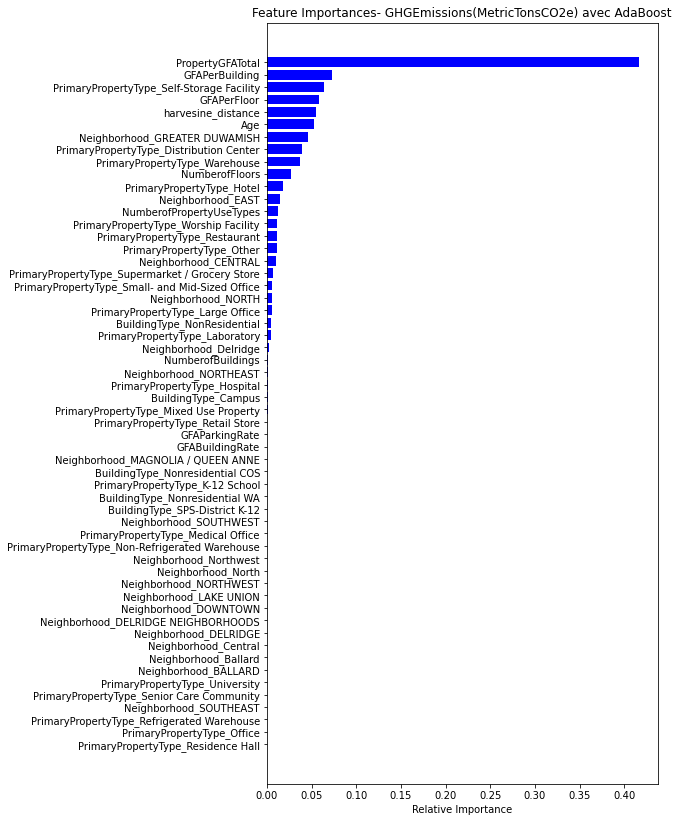

In [945]:
plt.rcParams['figure.figsize'] = (7, 14)
imp = ABR.feature_importances_
features = XTrain.columns
indices = np.argsort(imp)
plt.title('Feature Importances- GHGEmissions(MetricTonsCO2e) avec AdaBoost')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [947]:
ABR = AdaBoostRegressor()

def modelfit2(alg, XTrain, YTrain, XTest, YTest):
    alg.fit(XTrain, YTrain) 
    
modelfit2(ABR, XTrain, YTrain['SiteEnergyUse(kBtu)'], XTest, YTest['SiteEnergyUse(kBtu)'])

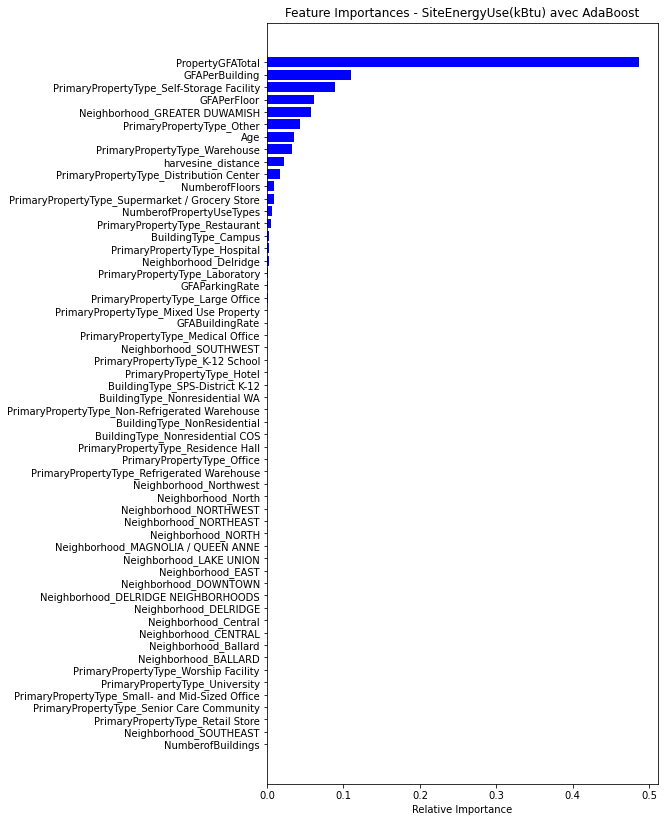

In [948]:
plt.rcParams['figure.figsize'] = (7, 14)
imp = ABR.feature_importances_
features = XTrain.columns
indices = np.argsort(imp)
plt.title('Feature Importances - SiteEnergyUse(kBtu) avec AdaBoost')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Quelques variables que l'on a crée ressortent de l'analyse : `GFAPerBuilding`, `GFAPerFloor`, `Age`, `harvesine_distance`. Et `PropertyGFATotal`est la variable la plus significative pour les deux modèles Y.

# <font color="#1d479b">Hyperparamètres avec GridSearch</font>

On cherche à savoir si le score `ENERGYSTARScore` améliore la prédiction de la variable `GHGEmissions(MetricTonsCO2e)`. Pour se faire, on va comparer les résultats sans `ENERGYSTARScore` et avec `ENERGYSTARScore`.

## <font color="#337da4">Grid Search sans ENERGYSTARScore</font>


In [984]:
data = pd.read_csv("2015_2016_building_energy_benchmarking_Encoded_Scaled_Log.csv",sep =",",index_col = "OSEBuildingID")

from sklearn.model_selection import train_test_split

X = data.drop(['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)'], axis=1) 
Y = data[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]               


XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Entrainement XTrain: {} lignes,\nTest XTest : {} lignes.\n".format(XTrain.shape[0],
                                                            XTest.shape[0]))

Entrainement XTrain: 1354 lignes,
Test XTest : 339 lignes.



In [980]:
from sklearn.model_selection import GridSearchCV

abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1.0],
 'loss' : ['linear', 'square', 'exponential']
 }

# Create 3 folds
#seed = 13
#kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(XTrain, YTrain['GHGEmissions(MetricTonsCO2e)'])
best_score = gridsearch.best_score_
best_model = gridsearch.best_estimator_


GridSearchCV(cv=kfold, error_score='raise',
            estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, 
            loss='linear', n_estimators=50, random_state=None),
            n_jobs=1,
            param_grid={'n_estimators': [50,60,70, 100], 
                        'learning_rate': [0.01, 0.05, 0.1, 0.5], 
                        'loss': ['linear', 'square', 'exponential']},
            pre_dispatch='2*n_jobs', 
            refit=True, 
            return_train_score=True,
            scoring=None,
            verbose=0) 
    
#test
y_true = YTest['GHGEmissions(MetricTonsCO2e)'].values
y_pred = best_model.predict(XTest)


print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gridsearch.best_estimator_)
print("\n The best score across ALL searched params:\n", gridsearch.best_score_)
print("\n The best parameters across ALL searched params:\n",gridsearch.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostRegressor(learning_rate=0.1, loss='exponential')

 The best score across ALL searched params:
 0.3869116661588015

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}


In [982]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred)     
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)


    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
regression_results(y_true, y_pred)

explained_variance:  0.4575
r2:  0.4574
MAE:  0.9104
MSE:  1.42
RMSE:  1.1916


Comparaison avec l'AdaBoost Regressor sans EneryStarScore et sans le GridSearch calculé avant:

* MAE : 0.9132645952089791
* R2 : 0.4757
* RMSE : 1.171
* MSE : 1.372

Dans ce cas précis la GridSearch n'est pas nécessaire. On garde alors le premier modèle.

## <font color="#337da4">Grid Search avec ENERGYSTARScore</font>


In [985]:
X['energystar_score'] = energystar_score
X.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,Age,NumberofPropertyUseTypes,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,energystar_score
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
325,-0.095052,-0.016385,-0.010189,-0.829186,-0.321464,0.450223,-0.450223,0.007310,-0.123819,-1.071110,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,91.0
400,-0.095052,0.290310,-0.076010,1.699998,-0.732143,-1.442480,1.442480,-0.060358,-0.365790,-1.162813,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,45.0
442,-0.095052,-0.016385,0.418244,0.450642,2.553287,-0.952945,0.952945,0.447764,0.316070,-0.740193,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,59.0
499,-0.095052,-0.169732,-0.188787,-1.408156,0.089215,-1.557555,1.557555,-0.176298,-0.171399,0.052059,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,76.0
559,-0.095052,-0.016385,0.382932,-0.585410,0.089215,0.450223,-0.450223,0.411462,0.279815,-0.797693,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,86.0


In [988]:
from sklearn.model_selection import GridSearchCV

abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1.0],
 'loss' : ['linear', 'square', 'exponential']
 }

# Create 3 folds
#seed = 13
#kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(XTrain, YTrain['GHGEmissions(MetricTonsCO2e)'])
best_score = gridsearch.best_score_
best_model = gridsearch.best_estimator_


GridSearchCV(cv=kfold, error_score='raise',
            estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, 
            loss='linear', n_estimators=50, random_state=None),
            n_jobs=1,
            param_grid={'n_estimators': [50,60,70, 100], 
                        'learning_rate': [0.01, 0.05, 0.1, 0.5], 
                        'loss': ['linear', 'square', 'exponential']},
            pre_dispatch='2*n_jobs', 
            refit=True, 
            return_train_score=True,
            scoring=None,
            verbose=0) 
    
#test
y_true = YTest['GHGEmissions(MetricTonsCO2e)'].values
y_pred = best_model.predict(XTest)


print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gridsearch.best_estimator_)
print("\n The best score across ALL searched params:\n", gridsearch.best_score_)
print("\n The best parameters across ALL searched params:\n",gridsearch.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100)

 The best score across ALL searched params:
 0.3874916628676062

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}


In [989]:
regression_results(y_true, y_pred)

explained_variance:  0.4592
r2:  0.4592
MAE:  0.9131
MSE:  1.4154
RMSE:  1.1897


Comparaison avec l'AdaBoost Regressor sans EneryStarScore et sans le GridSearch calculé avant:

* MAE : 0.9132645952089791
* R2 : 0.4757
* RMSE : 1.171
* MSE : 1.372

L'ajout de la variable `ENERGYSTARScore` améliore que très sensiblement le modèle. Ce qui corrobore la matrice de corrélation faite dans la première partie : Pélec_01_notebook.

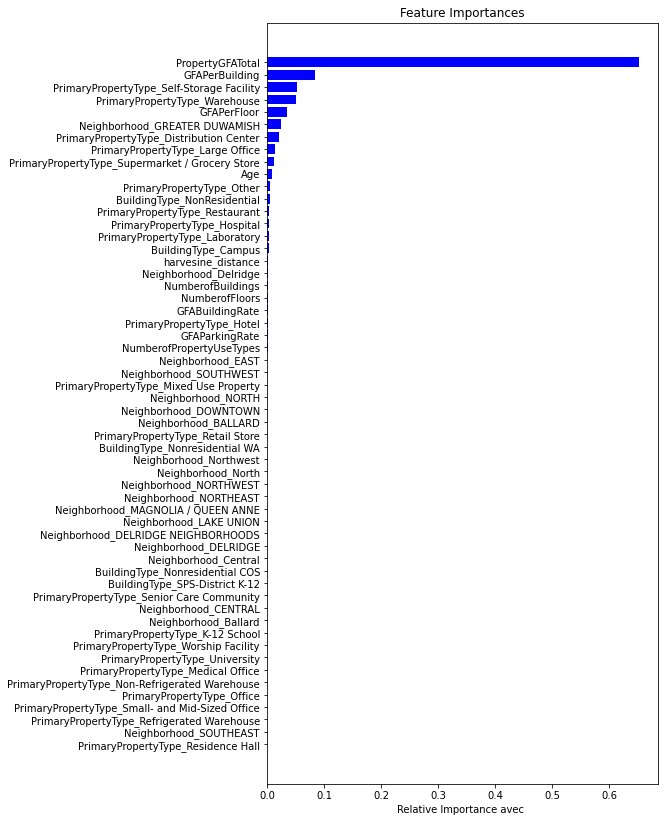

In [993]:
#Résultat de la GridSearch avec ENERGYSTARScore
plt.rcParams['figure.figsize'] = (7, 14)
imp = best_model.feature_importances_
features = XTrain.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance avec ')
plt.show()

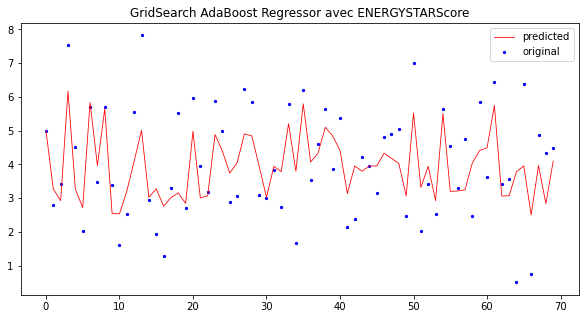

In [994]:
plt.rcParams['figure.figsize'] = (10,5)

#Résultat de la GridSearch avec ENERGYSTARScore
x_ax = range(len(y_pred[0:70]))
plt.scatter(x_ax, y_true[0:70], s=5, color="blue", label="original")
plt.plot(x_ax, y_pred[0:70], lw=0.8, color="red", label="predicted")
plt.legend()
plt.title('GridSearch AdaBoost Regressor avec ENERGYSTARScore')
plt.show()

**Conclusion** : Opter pour le modèle AdaBoost sans la GridSeachCV pour les hyperparamètres et sans ENERGYSTARScore.

sources modelisation : https://medium.com/diogo-menezes-borges/project-1-bigmart-sale-prediction-fdc04f07dc1e

sources pour l'étude : https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1
https://www.kaggle.com/michaelfumery/seattle-building-energy-cleaning
https://www.kaggle.com/michaelfumery/sea-building-energy-and-ghg-prediction
